<a href="https://colab.research.google.com/github/KostaKat/MAT442/blob/main/hw3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means

**K-means** is a clustering algorithm that divides *n* data points into *k* groups. However, what is the objective of this model?


Given a set of data points $\{x_1, x_2, \dots, x_n\} $, where each data point is a vector, K-means clustering partitions these data points into $ k(<n) $ clusters $ S = \{ S_1, S_2, \dots, S_k \} $. The goal is to minimize the **Within-Cluster Sum of Squares (WCSS)**:
$$
\text{WCSS}_i = \sum_{x \in S_i} \| x - \mu(S_i) \|^2
$$
where $ \mu(S_i) $ is the **mean** (centroid) of points in cluster $ S_i $, defined as:
$$
\mu(S) = \frac{1}{|S|} \sum_{x \in S} x
$$

Thus the  objective is:
$$
\arg \min_S \sum_{i=1}^k \text{WCSS}_i
$$

### K-means Steps

1. **Initialization**: Randomly select $ k $ initial cluster centers
2. **Assignment Step**: Assign each data point to the cluster with the nearest mean using the Euclidean distance
3. **Update Step**: Calculate the new centroid of each cluster by taking the mean of all points assigned to that cluster
4. **Repetition**: Repeat steps 2 and 3 until the centroids no longer change


Since the goal is to minimize the Within-Cluster Sum of Squares (WCSS), we start by defining:
$$
\text{WCSS}_i(v) = \sum_{x = (x_j) \in S_i} | v - x |^2 = \sum_{x = (x_j) \in S_i} \sum_{j=1}^d (v_j - x_j)^2
$$

Then, taking partial derivative of $ \text{WCSS}_i(v) $ with respect to $ v_m $ :
$$
\frac{\partial \text{WCSS}_i(v)}{\partial v_m} = \sum_{x = (x_j) \in S_i} 2(v_m - x_m),
$$

Lastly, setting the partial derivative equal to zero to minimize the WCSS,:
$$
v = \frac{1}{|S_i|} \sum_{x = (x_j) \in S_i} x_j
$$

Source: Our Textbook (with parts directly used and rephrased in my own words)

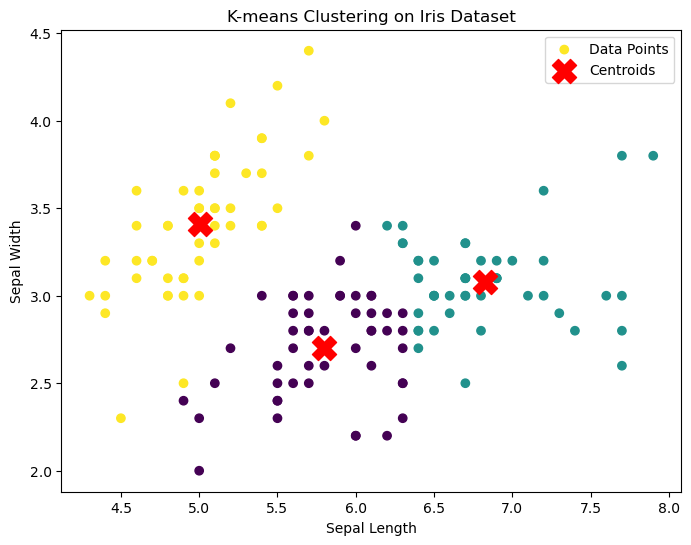

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # sepal length and sepal width

# calculate the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


class KMeans:
    def __init__(self, n_clusters=3, max_iters=10, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol  # Tolerance to check for convergence

    def fit(self, X):
        np.random.seed(0)
        # Randomly initialize centroids
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iters):
            # Assign each point to the nearest centroid
            self.labels = [self._closest_centroid(x) for x in X]

            # Compute new centroids
            new_centroids = np.array([X[np.array(self.labels) == j].mean(axis=0) for j in range(self.n_clusters)])

            # Check for convergence
            if np.all(np.abs(self.centroids - new_centroids) < self.tol):
                break
            self.centroids = new_centroids

    def _closest_centroid(self, x):
        distances = [euclidean_distance(x, centroid) for centroid in self.centroids]
        return np.argmin(distances)

    def predict(self, X):
        return np.array([self._closest_centroid(x) for x in X])


kmeans = KMeans(n_clusters=3) # for the number of classes in the Iris dataset (Setosa, Versicolour, and Virginica)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Source: ChatGPT
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', label='Data Points')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()


## Support Vector Machine

**Support Vector Machine (SVM)** is a supervised model used for classification and regression. SVMs aim to find the best boundary that separates data points into different classes.


The main goal of SVM is to determine a **hyperplane** that separates data points of different classes:
$$
\mathbf{w}^T \mathbf{x} - b = 0
$$
where:
- $ \mathbf{w} $ is the normal vector to the hyperplane.
- $ b $ is the bias term.


SVM tries to find two hyperplanes that separate two classes of data points in a dataset. It is aimed to maximized the region between these called the **margin**. The data points that lie closest to the hyperplane are called **support vectors**.

For a training set of $ n$ data points $ (\mathbf{x}_1, y_1), \dots, (\mathbf{x}_n, y_n)$, where $ y_i$ is either $ +1$ or $ -1$. This  $ y_i$  indicates the class of the data point $ \mathbf{x}_i$,:
$$
\mathbf{w}^T \mathbf{x} - b = 1
$$
$$
\mathbf{w}^T \mathbf{x} - b = -1
$$

We want all data points to fall into either $y_i$ = 1 or -1, so:
$$
y_i (\mathbf{w}^T \mathbf{x}_i - b) \geq 1 \quad \text{for all } i = 1, \dots, n
$$

Thus, our objective is the following:
$$
\min_{\mathbf{w}, b} \left\langle \underbrace{\lambda \|\mathbf{w}\|^2}_{\text{regularizer}} + \frac{1}{n} \sum_{i=1}^n \underbrace{\max \{0, 1 - y_i (\langle \mathbf{w}, \mathbf{x}_i \rangle - b)\}}_{\text{error term}} \right\rangle,
$$
Source: ChatGPT, it helped me write this in LaTeX


This can be solve using **stochastic gradient descent** :

$$
\text{New } b = \text{Old } b - \beta \left\{ \begin{array}{ll} y_i, & \text{if } 1 - y_i (\mathbf{w}^T \mathbf{x}_i - b) > 0, \\ 0, & \text{otherwise} \end{array} \right.
$$
$$
\text{New } \mathbf{w} = \text{Old } \mathbf{w} - \beta \left\{ \begin{array}{ll} 2 \lambda \mathbf{w} - \frac{1}{n} y_i \mathbf{x}_i, & \text{if } 1 - y_i (\mathbf{w}^T \mathbf{x}_i - b) > 0, \\ 2 \lambda \mathbf{w}, & \text{otherwise} \end{array} \right.
$$
Source: Our Textbook (with parts directly used and rephrased in my own words)


Accuracy: 100.00%


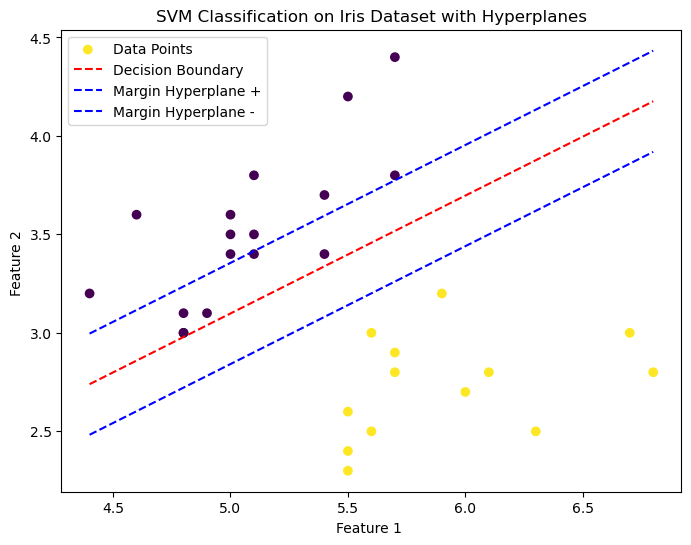

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features: sepal length and sepal width
y = iris.target
#source: ChatGPT

# Select only the samples where the class is 0 (Setosa) or 1 (Versicolor)
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# Convert class labels: 0 to -1 and 1 to 1
y = np.where(y == 0, -1, 1)

# Original work
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Stochastic Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(self.w, x_i) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Train
svm = SVM(learning_rate=0.001, lambda_param=0.001, n_iters=100)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Plotting the decision boundary and hyperplanes
def plot_svm(X, y, model):
    def decision_boundary(x):
        return -(model.w[0] * x + model.b) / model.w[1]

    def margin_hyperplane(x, offset):
        return -(model.w[0] * x + model.b + offset) / model.w[1]

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Data Points')

    # Plot the decision boundary
    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    plt.plot(x_vals, decision_boundary(x_vals), color='red', linestyle='--', label='Decision Boundary')

    # Plot the margin hyperplanes
    margin = 1 / np.linalg.norm(model.w)
    plt.plot(x_vals, margin_hyperplane(x_vals, -margin), color='blue', linestyle='--', label='Margin Hyperplane +')
    plt.plot(x_vals, margin_hyperplane(x_vals, margin), color='blue', linestyle='--', label='Margin Hyperplane -')

    plt.xlabel("Feature 1 ")
    plt.ylabel("Feature 2 ")
    plt.title("SVM Classification on Iris Dataset with Hyperplanes")
    plt.legend()
    plt.show()

plot_svm(X_test, y_test, svm)
